### Algoritmos de Aprendizaje supervisado.

### Importar librerías

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for scaling the data
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree


from sklearn import metrics
from collections import Counter

In [12]:
df = pd.read_csv("input/creditcard.csv")

In [13]:
print("Primeras filas del dataset")
df.head(10)

Primeras filas del dataset


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [14]:
print("Filas:",df.shape[0]," Columnas:", df.shape[1])

Filas: 284807  Columnas: 31


In [15]:
print("Estadísticas descriptivas de las columnas")
df.describe()

Estadísticas descriptivas de las columnas


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [16]:
print("Validar si hay valores nulos")
df.isnull().sum().sort_values(ascending = False)

Validar si hay valores nulos


Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64

In [17]:
df=df.drop(['Time'], axis=1)
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [18]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### Relación de la variable class

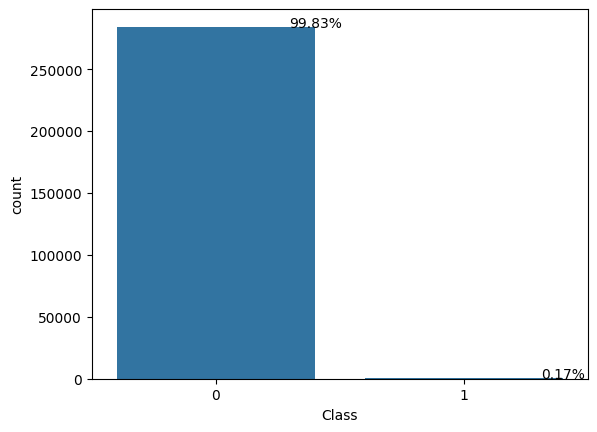

In [19]:
ax = sns.countplot(x='Class',data=df)
total = float(len(df))
for p in ax.patches:
    percentage="{:.2f}%".format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha="center")
plt.show()

### Correlación de las variables con class

In [20]:
df.corr()['Class'].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

Mostrar características destacadas


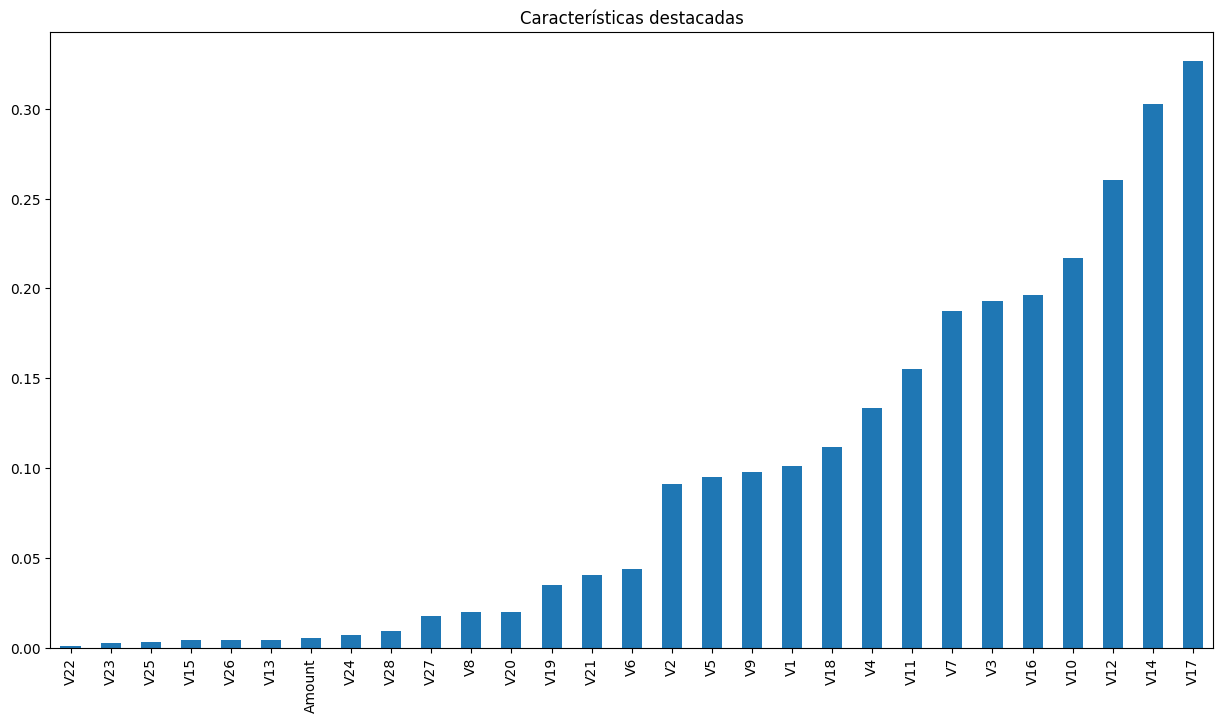

In [21]:
print("Mostrar características destacadas")
plt.figure(figsize=(15,8))
d = df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Características destacadas')

plt.show()

### Dividir en conjunto de entrenamiento y prueba


In [22]:
# Separar las características y la variable objetivo

X = df.drop('Class', axis=1)
y = df['Class']

In [23]:
# Separar en conjuntos de prueba(30%) y entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

Distribución de clases antes de SMOTE:
Class
0    199020
1       344
Name: count, dtype: int64


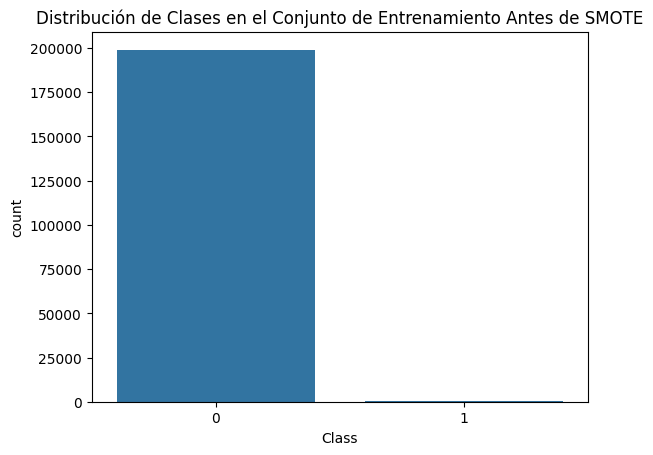

In [24]:
# Ver la distribución de clases antes de SMOTE
print("Distribución de clases antes de SMOTE:")
print(y_train.value_counts())

# Graficar la distribución de clases antes de SMOTE
sns.countplot(x=y_train)
plt.title("Distribución de Clases en el Conjunto de Entrenamiento Antes de SMOTE")
plt.show()

In [25]:
# Ver la cantidad de elementos en el conjunto de entrenamiento
num_train_samples = X_train.shape[0]

# Ver la cantidad de elementos en el conjunto de prueba
num_test_samples = X_test.shape[0]

# Sumar ambos conjuntos
total_samples = num_train_samples + num_test_samples

print(f"Cantidad de elementos en el conjunto de entrenamiento: {num_train_samples}")
print(f"Cantidad de elementos en el conjunto de prueba: {num_test_samples}")
print(f"Cantidad total de elementos en ambos conjuntos: {total_samples}")

Cantidad de elementos en el conjunto de entrenamiento: 199364
Cantidad de elementos en el conjunto de prueba: 85443
Cantidad total de elementos en ambos conjuntos: 284807


### Aplicar SMOTE al conjunto de entrenamiento

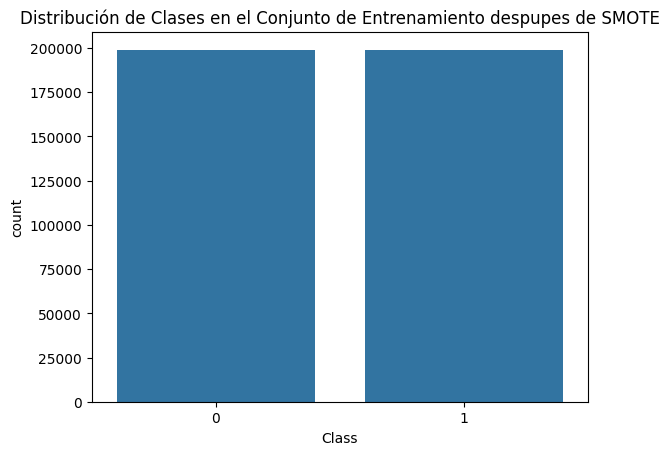

In [26]:
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

sns.countplot(x=y_train_res)
plt.title("Distribución de Clases en el Conjunto de Entrenamiento despupes de SMOTE")
plt.show()

In [27]:
# Ver la cantidad de elementos en el conjunto de entrenamiento
num_train_samples = X_train_res.shape[0]

# Ver la cantidad de elementos en el conjunto de prueba
num_test_samples = X_test.shape[0]

# Sumar ambos conjuntos
total_samples = num_train_samples + num_test_samples

print(f"Cantidad de elementos en el conjunto de entrenamiento: {num_train_samples}")
print(f"Cantidad de elementos en el conjunto de prueba: {num_test_samples}")
print(f"Cantidad total de elementos en ambos conjuntos: {total_samples}")

Cantidad de elementos en el conjunto de entrenamiento: 398040
Cantidad de elementos en el conjunto de prueba: 85443
Cantidad total de elementos en ambos conjuntos: 483483


## RANDOM FOREST

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:

rfc= RandomForestClassifier(n_jobs=-1, # Utilizar todos los procesadores disponibles
                            random_state=42,# Asegurar la reproducibilidad
                            criterion='gini',
                            n_estimators=200,#número de árboles
                            verbose=False)

In [30]:
# Entrenar el modelo con los datos balanceados
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42,
                       verbose=False)

In [31]:
# Predecir en el conjunto de prueba
y_pred = rfc.predict(X_test)


In [32]:
from sklearn.metrics import classification_report

print("Reporte de clasificación. Random Forest:")
print(classification_report(y_test, y_pred))
print("Accuracy: ",accuracy_score(y_test, y_pred))


Reporte de clasificación. Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.80      0.83       148

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy:  0.9994148145547324


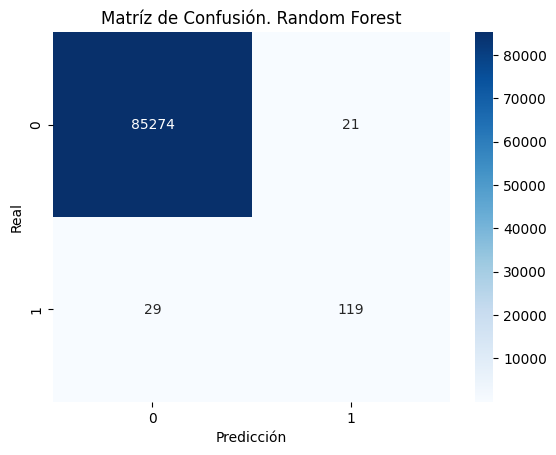

In [33]:

cmrf = confusion_matrix(y_test, y_pred)
sns.heatmap(cmrf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matríz de Confusión. Random Forest')
plt.show()

## REGRESIÓN LOGÍSTICA

In [34]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [35]:

# Predicción
y_predlr = lr.predict(X_test)


print("Reporte de clasificación. Regresión logística:")
print(classification_report(y_test, y_predlr))
print("Accuracy: ",accuracy_score(y_test, y_predlr))

Reporte de clasificación. Regresión logística:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.61      0.71       148

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy:  0.9991456292499094


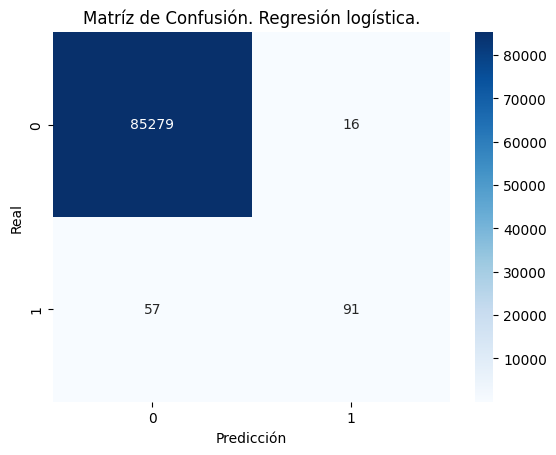

In [36]:
cmlr = confusion_matrix(y_test, y_predlr)
sns.heatmap(cmlr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matríz de Confusión. Regresión logística.')
plt.show()

## SVM. Support Vector Machines


In [37]:
# Importar las bibliotecas necesarias
from sklearn import svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report

# Escalar las características
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
# Instanciar y entrenar el modelo SVM con kernel lineal
SVMmodel = svm.SVC(kernel='linear', random_state=42,max_iter=3000)
SVMmodel.fit(X_train_scaled, y_train)

SVC(kernel='linear', max_iter=3000, random_state=42)

In [39]:
# Hacer predicciones en el conjunto de prueba
y_pred = SVMmodel.predict(X_test_scaled)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.75      0.78       148

    accuracy                           1.00     85443
   macro avg       0.91      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443



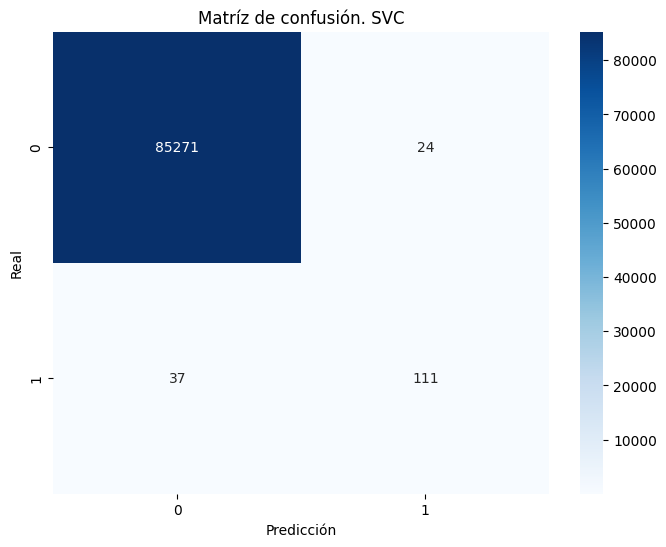

In [40]:
cmsvc = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cmsvc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matríz de confusión. SVC')
plt.show()
